## 1. Import od necessary libraries

In [1]:
import pyodbc as odbc
import pandas as pd
import sqlalchemy as sa
import matplotlib
from geopy import distance

## 2. Creating connection with SQL Server Database using pyodbbc + SQLAlchemy

In [2]:
DRIVER_NAME = 'SQL SERVER'
SERVER_NAME = 'DESKTOP-6DMIBIJ'
DATABASE_NAME = 'Olist'

connection_string = f"mssql+pyodbc://@{SERVER_NAME}/{DATABASE_NAME}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
engine = sa.create_engine(connection_string)

## 3. Load Datasets

#### Customers table

In [3]:
df_customers = pd.read_sql('SELECT* FROM dbo.customers', engine)
print(f"Shape of df_customers: {df_customers.shape}\n")
df_customers.head()

Shape of df_customers: (99441, 5)



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,None,None
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,None,None


#### Geolocation table

In [4]:
df_geolocation = pd.read_sql('SELECT * FROM dbo.geolocation', engine)
print(f"Shape of df_geolocation: {df_geolocation.shape}\n")
df_geolocation.head()

Shape of df_geolocation: (1000163, 5)



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Sellers table

In [5]:
df_sellers = pd.read_sql('SELECT * FROM dbo.sellers', engine)
print(f"Shape of df_sellers: {df_sellers.shape}\n")
df_sellers.head()

Shape of df_sellers: (3095, 4)



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,9080,santo andre,SP
1,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES
2,001e6ad469a905060d959994f1b41e4f,24754,sao goncalo,RJ
3,002100f778ceb8431b7a1020ff7ab48f,14405,None,SP
4,003554e2dce176b5555353e4f3555ac8,74565,goiania,GO


#### Orders table

In [6]:
df_orders = pd.read_sql('SELECT * FROM dbo.orders', engine)
print(f"Shape of df_orders: {df_orders.shape}\n")
df_orders.head()

Shape of df_orders: (99441, 8)



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


#### Order payments table

In [7]:
df_order_payments = pd.read_sql('SELECT * FROM dbo.order_payments', engine)
print(f"Shape of df_order_payments: {df_order_payments.shape}\n")
df_order_payments.head()

Shape of df_order_payments: (103886, 5)



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,NaN
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,NaN


#### Order items table

In [8]:
df_order_items = pd.read_sql('SELECT * FROM dbo.order_items', engine)
print(f"Shape of df_order_items: {df_order_items.shape}\n")
df_order_items.head()

Shape of df_order_items: (112650, 7)



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Products table

In [9]:
df_products = pd.read_sql('SELECT * FROM dbo.products', engine)
print(f"Shape of df_products: {df_products.shape}\n")
df_products.head()

Shape of df_products: (32951, 9)



,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,000d9be29b5207b54e86aa1b1ac54872,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0


#### Product category translation

In [10]:
df_product_category_translations = pd.read_sql('SELECT * FROM dbo.product_category_translation', engine)
print(f"Shape of df_product_category_translation: {df_product_category_translations.shape}\n")
df_product_category_translations.head()

Shape of df_product_category_translation: (71, 2)



,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Order reviews table

In [11]:
df_order_reviews = pd.read_sql('SELECT * FROM dbo.order_reviews', engine)
print(f"Shape of df_order_reviews: {df_order_reviews.shape}\n")
df_order_reviews.head()

Shape of df_order_reviews: (104719, 6)



,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,4.0,None,None,2018-01-18,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,5.0,None,None,2018-03-10,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,5.0,None,None,2018-02-17,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,5.0,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,None,ParabĂ©ns lojas lannister adorei comprar pela ...,2018-03-01,2018-03-02 10:26:53


## 4. Initial Data Insight & NaN Check & Duplicate Analysis

#### Customers Table 

In [12]:
print(f"Number of duplicated rows: {len(df_customers[df_customers.duplicated()])}\n")
df_customers.info()

Number of duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             67967 non-null  object
 4   customer_state            67967 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Number of NaN values 

In [13]:
df_customers.isna().sum()

customer_id                     0
customer_unique_id              0
customer_zip_code_prefix        0
customer_city               31474
customer_state              31474
dtype: int64

% of NaN values

In [14]:
df_customers.isna().mean()*100

customer_id                  0.000000
customer_unique_id           0.000000
customer_zip_code_prefix     0.000000
customer_city               31.650929
customer_state              31.650929
dtype: float64

<Axes: title={'center': 'Top 5 cities by number of Customers'}, xlabel='customer_city'>

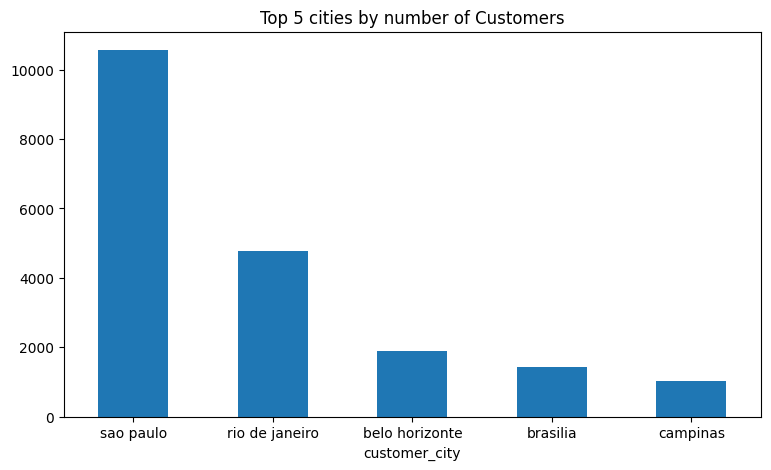

In [15]:
df_customers["customer_city"].value_counts().head().plot.bar(title="Top 5 cities by number of Customers", x = "City name", y = "Number of clients", rot = 0, figsize = (9,5))

<Axes: title={'center': 'Top 5 states by number of Customers'}, xlabel='customer_state'>

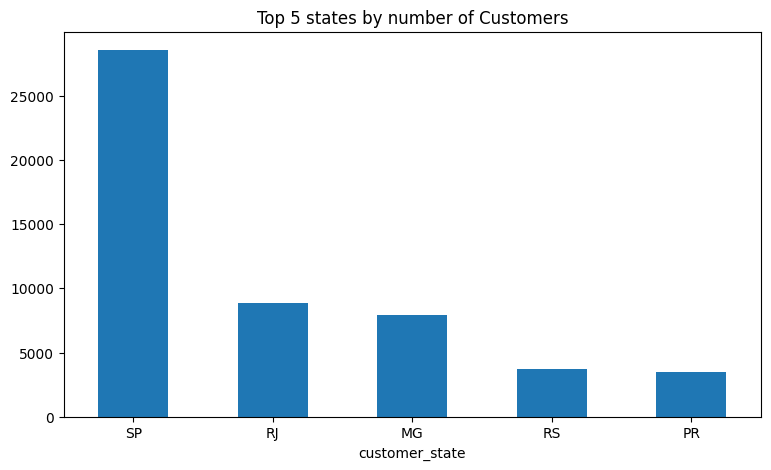

In [16]:
df_customers["customer_state"].value_counts().head().plot.bar(title="Top 5 states by number of Customers", x = "State name", y = "Number of clients", rot = 0, figsize = (9,5))

#### Geolocation table

In [17]:
print(f"Number of duplicated rows: {len(df_geolocation[df_geolocation.duplicated()])}\n")
df_geolocation.info()

Number of duplicated rows: 271868

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Number of NaN values 

In [18]:
df_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

% of NaN values

In [19]:
df_geolocation.isna().mean()*100

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

#### Sellers table

In [20]:
print(f"Number of duplicated rows: {len(df_sellers[df_sellers.duplicated()])}\n")
df_sellers.info()

Number of duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             2390 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Number of NaN values 

In [21]:
df_sellers.isna().sum()

seller_id                   0
seller_zip_code_prefix      0
seller_city               705
seller_state                0
dtype: int64

% of NaN values

In [22]:
df_sellers.isna().mean()*100

seller_id                  0.000000
seller_zip_code_prefix     0.000000
seller_city               22.778675
seller_state               0.000000
dtype: float64

<Axes: title={'center': 'Top 5 cities by number of Sellers'}, xlabel='seller_city'>

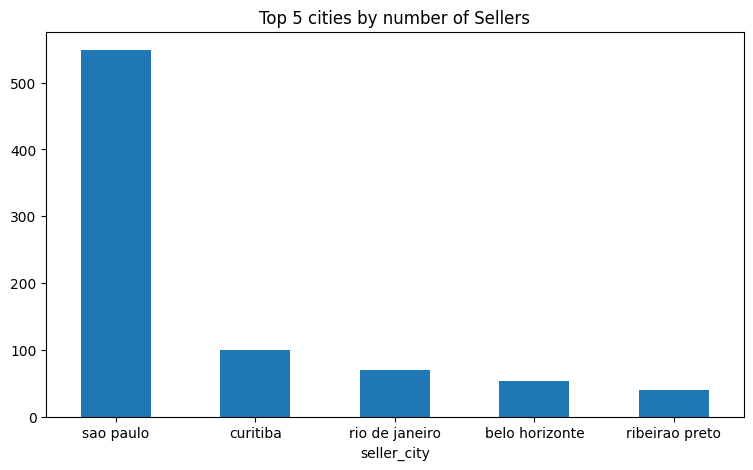

In [23]:
df_sellers["seller_city"].value_counts().head().plot.bar(title="Top 5 cities by number of Sellers", x = "City name", y = "Number of Sellers", rot = 0, figsize = (9,5))

<Axes: title={'center': 'Top 5 states by number of Sellers'}, xlabel='seller_state'>

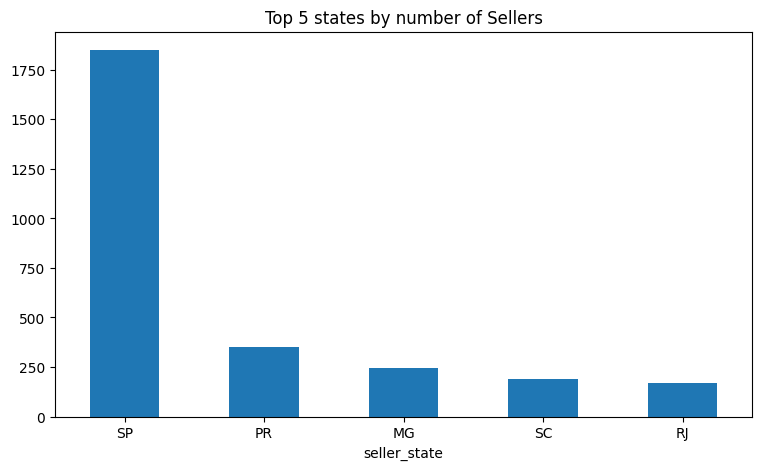

In [24]:
df_sellers["seller_state"].value_counts().head().plot.bar(title="Top 5 states by number of Sellers", x = "State name", y = "Number of Sellers", rot = 0, figsize = (9,5))

#### Orders table

In [25]:
print(f"Number of duplicated rows: {len(df_orders[df_orders.duplicated()])}\n")
df_orders.info()

Number of duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99102 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Number of NaN values 

In [26]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date     339
dtype: int64

% of NaN values

In [27]:
df_orders.isna().mean()*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.340906
dtype: float64

Number of orders for each status

In [28]:
df_orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

#### Order payments table

In [29]:
print(f"Number of duplicated rows: {len(df_order_payments[df_order_payments.duplicated()])}\n")
df_order_payments.info()

Number of duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         84314 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Number of NaN values 

In [30]:
df_order_payments.isna().sum()

order_id                    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value           19572
dtype: int64

% of NaN values

In [31]:
df_order_payments.isna().mean()*100

order_id                 0.000000
payment_sequential       0.000000
payment_type             0.000000
payment_installments     0.000000
payment_value           18.839882
dtype: float64

<Axes: title={'center': 'Number of payments made in each payment type'}, xlabel='payment_type'>

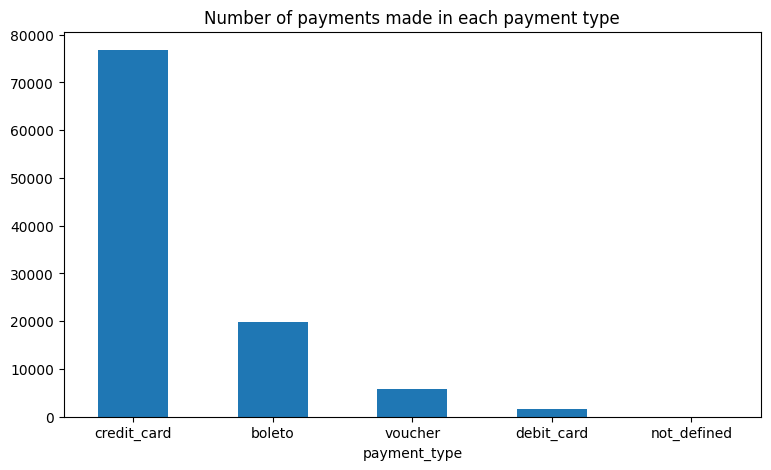

In [32]:
df_order_payments["payment_type"].value_counts().plot.bar(title = "Number of payments made in each payment type", x = "payment type", y = "number of payments", rot = 0, figsize = (9,5))

#### Order items table

In [33]:
print(f"Number of duplicated rows: {len(df_order_items[df_order_items.duplicated()])}\n")
df_order_items.info()

Number of duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Number of NaN values 

In [34]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

% of NaN values

In [35]:
df_order_items.isna().mean()*100

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [36]:
df_order_items["price"].describe().round()

count    112650.0
mean        121.0
std         184.0
min           1.0
25%          40.0
50%          75.0
75%         135.0
max        6735.0
Name: price, dtype: float64

In [37]:
df_order_items["freight_value"].describe().round()

count    112650.0
mean         20.0
std          16.0
min           0.0
25%          13.0
50%          16.0
75%          21.0
max         410.0
Name: freight_value, dtype: float64

Top 5 Orders size by product's number 

In [38]:
unique_orders = df_order_items.groupby(by="order_id")['order_item_id'].idxmax()
df_order_items.loc[unique_orders]["order_item_id"].value_counts()

order_item_id
1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
8         8
10        8
12        5
11        4
9         3
20        2
14        2
15        2
13        1
21        1
Name: count, dtype: int64

#### Products table

In [39]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

% of NaN values

In [40]:
df_products.isna().mean()*100

product_id                    0.000000
product_category_name         1.851234
product_name_length           1.851234
product_description_length    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [41]:
df_products["product_weight_g"].describe().round()

count    32949.0
mean      2276.0
std       4282.0
min          0.0
25%        300.0
50%        700.0
75%       1900.0
max      40425.0
Name: product_weight_g, dtype: float64

#### Product category translation

In [42]:
df_product_category_translations.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

% of NaN values

In [43]:
df_product_category_translations.isna().mean()*100

product_category_name            0.0
product_category_name_english    0.0
dtype: float64

#### Order reviews table

In [44]:
df_order_reviews.isna().sum()

order_id                    2793
review_score                3073
review_comment_title       92714
review_comment_message     63674
review_creation_date        9324
review_answer_timestamp     9341
dtype: int64

% of NaN values

In [45]:
df_order_reviews.isna().mean()*100

order_id                    2.667138
review_score                2.934520
review_comment_title       88.535987
review_comment_message     60.804630
review_creation_date        8.903828
review_answer_timestamp     8.920062
dtype: float64

In [46]:
df_order_reviews["review_score"].value_counts()

review_score
5.0        57328
4.0        19142
1.0        11424
3.0         8179
2.0         3151
           ...  
42753.0        1
43302.0        1
43301.0        1
42944.0        1
42816.0        1
Name: count, Length: 573, dtype: int64

In [47]:
df_order_reviews["review_score"].value_counts().head(10)

review_score
5.0        57328
4.0        19142
1.0        11424
3.0         8179
2.0         3151
43089.0       15
43331.0       15
43179.0       14
43231.0       14
43315.0       14
Name: count, dtype: int64

#### 5. Data Cleaning

5.1. Remove rows in df_customers table, where either the seller_zip_code_pref or customer_zip_code_pref columns contain more than 6 characters or include letters

In [48]:
df_customers["customer_zip_code_prefix"] = df_customers["customer_zip_code_prefix"].astype(str)
df_customers[df_customers["customer_zip_code_prefix"].str.len()>6]
df_customers["customer_zip_code_prefix"] = df_customers["customer_zip_code_prefix"].astype(int)
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

5.2. Check for Spanish characters in customer_city data.

In [49]:
spanish_chars  = ['á', 'é', 'í', 'ó', 'ú', 'ñ', 'Á', 'É', 'Í', 'Ó', 'Ú', 'Ñ']
mask = df_customers["customer_city"].str.contains('|'.join(spanish_chars), na = False)
print(f"Number of rows with hispanic chars: {len(df_customers[mask])}")
print(f"Number of cities with hispanic chars: {df_customers.loc[mask,"customer_city"].nunique()}")
df_customers[mask].head()

Number of rows with hispanic chars: 0
Number of cities with hispanic chars: 0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


5.3. Check for Spanish characters in geolocation_city data, and replacing it

In [50]:
mask = df_geolocation["geolocation_city"].str.contains('|'.join(spanish_chars))
print(f"Number of rows with hispanic chars in geolocation_city: {len(df_geolocation[mask])}")
print(f"Number of cities with hispanic chars: {df_geolocation.loc[mask,"geolocation_city"].nunique()}")
df_geolocation[mask].head()

Number of rows with hispanic chars in geolocation_city: 29719
Number of cities with hispanic chars: 1222


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
61340,65081,-2.557062,-44.240918,sao luís,MA
61348,65071,-2.487994,-44.247180,sao luís,MA
61349,65070,-2.516840,-44.257065,sao luís,MA
61352,65068,-2.501043,-44.235078,sao luís,MA
61353,65083,-2.508166,-44.236216,sao luís,MA


In [51]:
replace_dict = {
    'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ñ': 'n', 'ç': 'c',
    'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U', 'Ñ': 'N', 'Ç': 'C'
}

for old_val, new_val in replace_dict.items():
    df_geolocation["geolocation_city"] = df_geolocation["geolocation_city"].str.replace(old_val, new_val)
df_geolocation["geolocation_city"] = df_geolocation["geolocation_city"].str.replace(r"[-'']", '', regex=True)

5.4. Check for spanish characters in product's category name

In [52]:
mask = df_products["product_category_name"].str.contains('|'.join(spanish_chars),na = False)

print(f"Number of rows with hispanic chars in product_category_name: {len(df_products[mask])}")
print(f"Number of products category name with hispanic chars: {df_products.loc[mask,"product_category_name"].nunique()}")

Number of rows with hispanic chars in product_category_name: 0
Number of products category name with hispanic chars: 0


Checking the result of the code

In [53]:
mask = df_geolocation["geolocation_city"].str.contains('|'.join(spanish_chars))
print(f"Number of rows with hispanic chars in geolocation city{df_geolocation.loc[mask,"geolocation_city"]}")

Number of rows with hispanic chars in geolocation citySeries([], Name: geolocation_city, dtype: object)


5.5. Identify cases where order purchase date is later than any other date.

In [54]:
mask_check1 = (df_orders["order_purchase_timestamp"] > df_orders["order_approved_at"]) 
print(f"Number of orders that have later datetime of purchase than datetime of order approved: {len(df_orders.loc[mask_check1,])}")
mask_check2 = (df_orders["order_purchase_timestamp"] > df_orders["order_delivered_carrier_date"])
print(f"Number of rows that have later dateime of purchase than datetime of order carrier delivered: {len(df_orders.loc[mask_check2,])}")
order_list = df_orders["order_id"].loc[mask_check2,]
mask_check3 = (df_orders["order_purchase_timestamp"] > df_orders["order_delivered_customer_date"])
print(f"Number of rows taht have later datetime of purchase than datetime of order delivered to customer: {len(df_orders.loc[mask_check3,])}")
mask_check4 = (df_orders["order_purchase_timestamp"] > df_orders["order_estimated_delivery_date"])
print(f"Number of rows taht have later datetime of purchase than datetime of estimated delivery datetime: {len(df_orders.loc[mask_check4,])}")

Number of orders that have later datetime of purchase than datetime of order approved: 0
Number of rows that have later dateime of purchase than datetime of order carrier delivered: 166
Number of rows taht have later datetime of purchase than datetime of order delivered to customer: 0
Number of rows taht have later datetime of purchase than datetime of estimated delivery datetime: 0


<Axes: title={'center': 'Number and status of orders that have later date of purchase than delivered carried date'}, xlabel='order_status'>

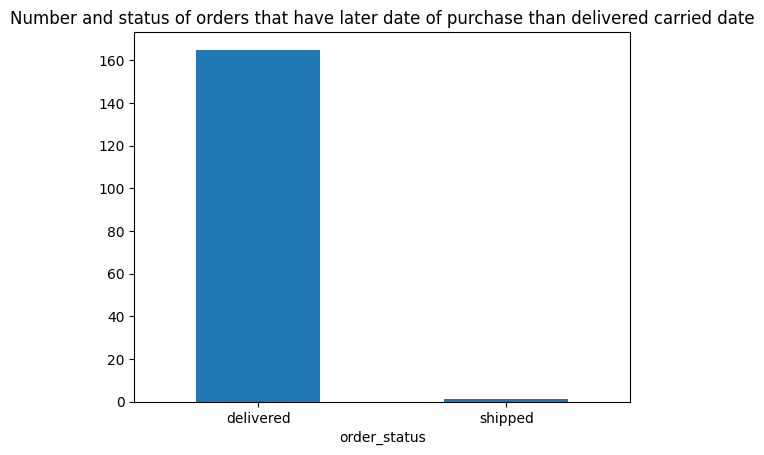

In [55]:
df_orders[df_orders["order_id"].isin(order_list)]["order_status"].value_counts().plot.bar(title = "Number and status of orders that have later date of purchase than delivered carried date",
                                                                                          rot = 0)

Possible causes for this discrepancy:
- Data pipeline processing delays, ETL jobs running with latency
- System timing errors, clock synchronization problems between different systems

5.6. Check if there are cases where product_weight or product_length or height or width <= 0

In [56]:
mask = df_products["product_weight_g"] <= 0 
print(f"Number of products that have product_weight <=0: {len(df_products.loc[mask])}")
mask = df_products["product_length_cm"] <= 0
print(f"Number of products that have product_length <=0: {len(df_products.loc[mask])}")
mask = df_products["product_height_cm"] <= 0
print(f"Number of products that have product_heigh <=0: {len(df_products.loc[mask])}")
mask = df_products["product_width_cm"] <= 0
print(f"Number of products that have product_width <=0: {len(df_products.loc[mask])}")

Number of products that have product_weight <=0: 4
Number of products that have product_length <=0: 0
Number of products that have product_heigh <=0: 0
Number of products that have product_width <=0: 0


4 products have weight equal to 0, let's list these products

In [57]:
df_products[df_products["product_weight_g"] == 0]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
7099,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
16580,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
16721,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
29660,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


And let's see what's the product category means in english

In [58]:
df_product_category_translations[df_product_category_translations["product_category_name"] == "cama_mesa_banho"]

,product_category_name,product_category_name_english
3,cama_mesa_banho,bed_bath_table


Possible reasons why 4 products in the 'bed_bath_table' category show 0 gram weight:
- Data entry errors, missing weight values defaulted to 0 in the system
- Database synchronization issues, weight values not properly updated across systems

5.7. Checking how many records in df_order_items have price or freight_value less than or equal to 0

In [59]:
mask = (df_order_items["price"] <= 0) #| 
print(f"Number of items which have price lower or equal to zero: {len(df_order_items[mask])}")
mask = (df_order_items["freight_value"] <= 0)
print(f"Number of items which have freight value lower or equal to zero: {len(df_order_items[mask])}")

Number of items which have price lower or equal to zero: 0
Number of items which have freight value lower or equal to zero: 383


Potential causes of free customer delivery:
- Free shipping promotions
- Membership benefits

#### 6. Filling NaN's & Data Calculations

6.1. Filling missing customer location data (customer_city and customer_state) using zip code mapping from the geolocation table, or if the zip code has completed data in another row, then I retrieve the data from there.

In [60]:
zip_code_not_empty = df_customers[(df_customers['customer_state'].notna()) & (df_customers['customer_city'].notna())]['customer_zip_code_prefix'].unique() 

filtered = df_customers[~df_customers['customer_zip_code_prefix'].isin(zip_code_not_empty)]
result = filtered.groupby("customer_zip_code_prefix").size().reset_index(name="l")
print(f"Number of customer_zip_code entries lacking any complete record in the customers table (with both state and country populated): {result["l"].sum()}")
result.sort_values(by = ["l"], ascending = False)

Number of customer_zip_code entries lacking any complete record in the customers table (with both state and country populated): 1692


,customer_zip_code_prefix,l
335,18606,6
149,4657,6
1014,78115,6
172,5203,5
12,1331,5
...,...,...
1209,96460,1
1210,96540,1
1211,96824,1
1212,96843,1


1246 distinct customer_zip_code_prefix values show no populated state or city fields in the customers dataset, comprising 1692 affected records in total <br><br>
Now, extract geolocation data for these specific zip codes from the geolocation table, as they lack duplicate records in the customers dataset

In [61]:
zip_code_list_of_full_nulls = result["customer_zip_code_prefix"].to_list()
zip_code_list_of_full_nulls[:5]

[1003, 1016, 1021, 1022, 1023]

In [62]:
print(f"Before filling NaN values: {(df_customers["customer_state"].notna().sum())}")
mask = df_customers["customer_zip_code_prefix"].isin(zip_code_list_of_full_nulls)
df_customers.loc[mask,"customer_state"] = df_customers.loc[mask,"customer_state"].fillna(df_geolocation["geolocation_state"])
df_customers.loc[mask,"customer_city"] = df_customers.loc[mask,"customer_city"].fillna(df_geolocation["geolocation_city"])
df_customers[mask]
print(f"After filling NaN values: {df_customers["customer_state"].notna().sum()}")

Before filling NaN values: 67967
After filling NaN values: 69659


69659 - 67967 = 1692 → This matches the count of customer_zip_code_prefix values that previously had NO complete records and have now been filled

After this I check how many customer_zip_code_prefix values have NULL entered in city and state, but also have completed data in another row.

In [63]:
print(f"Remaining missing data for customer_state before filling: {df_customers["customer_state"].isna().sum()}")
print(f"Remaining missing data for customer_city before filling: {df_customers["customer_city"].isna().sum()}")

Remaining missing data for customer_state before filling: 29782
Remaining missing data for customer_city before filling: 29782


In [64]:
df_customers["customer_state"] = df_customers.groupby(by="customer_zip_code_prefix")["customer_state"].transform("first")
df_customers["customer_city"] = df_customers.groupby(by="customer_zip_code_prefix")["customer_city"].transform("first")

print(f"Remaining missing data for customer_state after filling:  {df_customers["customer_state"].isna().sum()}")
print(f"Remaining missing data for customer_city after filling: {df_customers["customer_city"].isna().sum()}")


Remaining missing data for customer_state after filling:  0
Remaining missing data for customer_city after filling: 0


Confirmation of no NaN values after filling 

In [65]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

6.2. Filling missing values in the seller_city column from the 'olist_sellers_dataset' table based on preserved seller_zip_code_prefix

Some rows with empty seller city

In [66]:
mask = df_sellers["seller_city"].isna()
df_sellers.loc[mask].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3,002100f778ceb8431b7a1020ff7ab48f,14405,None,SP
5,004c9cd9d87a3c30c522c48c4fc07416,14940,None,SP
7,00ab3eff1b5192e5f1a63bcecfee11c8,4164,None,SP
13,011b0eaba87386a2ae96a7d32bb531d1,17580,None,SP
18,0176f73cc1195f367f7b32db1e5b3aa8,14940,None,SP


In [67]:
df_geolocation.reset_index(inplace = True)
df_sellers.reset_index(inplace = True)
mapping = df_geolocation.groupby("geolocation_zip_code_prefix")["geolocation_city"].first()
df_sellers.loc[mask,"seller_city"] = df_sellers.loc[mask,"seller_city"].fillna(df_sellers["seller_zip_code_prefix"].map(mapping))
df_sellers[df_sellers["seller_city"].isna()]

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
1088,1088,5962468f885ea01a1b6a97a218797b0a,82040,NaN,PR


There is one seller zip code value = 82040 for which no matching record was found in the geolocation table<br>
Let's verify if there are indeed no rows with this corresponding value in df_geolocation

In [68]:
print(f"Number of rows in df_geolocation which have zip code prefix = 82040: {len(df_geolocation[df_geolocation["geolocation_zip_code_prefix"] == 82040])}")

Number of rows in df_geolocation which have zip code prefix = 82040: 0


In [69]:
len(df_geolocation[df_geolocation["geolocation_state"] == "PR"]["geolocation_city"].unique())

489

In [70]:
df_sellers.dropna(inplace = True)

The row with empty seller_city has the seller_state = 'PR' field populated, however based on this we still cannot determine what the city value should be, because for state = 'PR' there are 489 different cities<br><br>
Possible reasons for the lack of a corresponding value for this zip code prefix:
- Data entry error
- Outdated zip code information

6.3. Filling missing data values from the payment_value column in the 'olist_order_payments_dataset' table. This value can be calculated from the 'olist_order_items_dataset' table by summing the price + freight_value for a specific order_id

We need to handle cases where in order_payments table, a single order has mixed complete and missing payment values across multiple rows. The missing amount should be distributed equally among the empty rows.

In [71]:
### TO TEST

In [72]:
df_order_items["payment_value"] = df_order_items["price"] + df_order_items["freight_value"]

In [73]:
order_payment_value_nulls = df_order_payments[df_order_payments["payment_value"].isna()]["order_id"]
part_empty_payment_value = df_order_payments[df_order_payments["order_id"].isin(order_payment_value_nulls)]

In [74]:
mapping = df_order_items.groupby("order_id")["payment_value"].first()
full_payments_value = df_order_items.groupby("order_id")["payment_value"].sum()
full_payments_value.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214     72.19
00018f77f2f0320c557190d7a144bdd3    259.83
000229ec398224ef6ca0657da4fc703e    216.87
00024acbcdf0a6daa1e931b038114c75     25.78
00042b26cf59d7ce69dfabb4e55b4fd9    218.04
Name: payment_value, dtype: float64

In [75]:
for order_id, group in part_empty_payment_value.groupby(by="order_id"):
    # Jeśli grupa jest jednoelementowa to całość kwoty będzie brana z order_items
    try:
        if len(group) == 1:
            part_empty_payment_value.loc[group.index,"payment_value"] = group["payment_value"].fillna(group["order_id"].map(mapping))
        
        else: 
            current_payment_sum = group["payment_value"].sum()
            full_value = full_payments_value.loc[group["order_id"]].iloc[0]
            mask = group["payment_value"].isna()
            nan_counts = len(mask[mask])
            value_to_fulfill = (full_value - current_payment_sum)/nan_counts
            part_empty_payment_value.loc[group.index,"payment_value"] = group["payment_value"].fillna(value_to_fulfill)
        
    except KeyError:
        continue

In [76]:
mask = part_empty_payment_value["payment_value"].isna()
part_empty_payment_value.loc[mask]["order_id"].value_counts()

order_id
0b398dbb3e7c81005f3c69b01488c4c9    3
cdf36cd4632fe33085adec5cf3d6b306    2
6ec704c9a120baaa6b3e162255ec684b    2
c037dd9db2ac27aa44381219612e91ba    1
bd7585a77f0aa76b3775bb68fb293356    1
                                   ..
d8a40a1358d3b2dca231abdaa566b054    1
15ec3d48383c58c0dc96cd66f8884630    1
115b01b1f77f0e02812425b6f5cd8f2f    1
85a22eb264ad44ff56c4955a66876fed    1
35de4050331c6c644cddc86f4f2d0d64    1
Name: count, Length: 152, dtype: int64

In [77]:
part_empty_payment_value["payment_value"].isna().sum()

np.int64(156)

After filling in the missing data, there are 156 rows that still don’t have payment_value filled in, of which 152 are unique order_id values (meaning these empty rows don’t have a corresponding entry in order_items).

In [78]:
# To be decided what to do with these rows 

6.4. Filling missing values in the order_estimated_delivery_date column for the df_orders, based on the average delivery time of historical orders for that seller_city and customer_city, where the average is calculated using the 'order_purchase_timestamp' and 'order_delivered_customer_date' columns

As reminder number of NaNs in df_orders

In [79]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date     339
dtype: int64

In [80]:
mask = df_orders["order_purchase_timestamp"].notna() & df_orders["order_delivered_customer_date"].notna()
df_orders_calc = df_orders.loc[mask]

For this purpose, we need to merge three DataFrames: df_orders, df_order_items, and df_sellers (df_order_items is necessary because it provides the connection between orders and sellers) <br>
We remove duplicates from the df_order_items table based on the order_id column to obtain unique order identifiers

In [81]:
df_order_items = df_order_items.drop_duplicates(subset = "order_id", keep="first")

In [82]:
merged = (df_order_items.merge(df_orders_calc[["order_id","customer_id","order_purchase_timestamp","order_delivered_customer_date"]], on="order_id")
                        .merge(df_customers[["customer_id","customer_city"]], on = "customer_id")
                        .merge(df_sellers[["seller_id","seller_city"]], on = "seller_id")

)
merged["number_of_days_to_deliver"] = (merged["order_delivered_customer_date"] - merged["order_purchase_timestamp"])
merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,customer_city,seller_city,number_of_days_to_deliver
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,campos dos goytacazes,volta redonda,7 days 14:44:46
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,santa fe do sul,sao paulo,16 days 05:11:18
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,para de minas,borda da mata,7 days 22:45:45
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,atibaia,franca,6 days 03:32:04
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,varzea paulista,loanda,25 days 02:44:40


In [83]:
merged.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_value                    0
customer_id                      0
order_purchase_timestamp         0
order_delivered_customer_date    0
customer_city                    0
seller_city                      0
number_of_days_to_deliver        0
dtype: int64

This is a DataFrame serving as a 'dictionary' of average delivery days between two cities (customer_city - seller_city)

In [84]:
avg_days_between_cities = merged.groupby(by=["customer_city","seller_city"])["number_of_days_to_deliver"].mean()
avg_days_between_cities.head()

customer_city        seller_city   
abadia dos dourados  montenegro       21 days 02:31:32
                     rio de janeiro    8 days 15:12:06
                     sao paulo         5 days 20:14:40
abadiania            sao paulo        29 days 02:27:21
abaete               bauru             7 days 06:51:31
Name: number_of_days_to_deliver, dtype: timedelta64[ns]

Now we need to perform another join and fill the missing values in df_orders (estimated_delivery_time column) by adding date_purchase + the average number of delivery days between those cities

In [85]:
merged_orders = (df_orders.merge(df_order_items[["order_id","seller_id"]],on="order_id")
                          .merge(df_sellers[["seller_id","seller_city"]], on = "seller_id")
                          .merge(df_customers[["customer_id","customer_city"]],on = "customer_id")

)
merged_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,customer_city
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,48436dade18ac8b2bce089ec2a041202,volta redonda,campos dos goytacazes
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,santa fe do sul
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,5b51032eddd242adc84c38acab88f23d,borda da mata,para de minas
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,9d7a1d34a5052409006425275ba1c2b4,franca,atibaia
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,df560393f3a51e74553ab94004ba5c87,loanda,varzea paulista
...,...,...,...,...,...,...,...,...,...,...,...
98653,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,b8bc237ba3788b23da09c0f1f3a3288c,itajai,sao luis
98654,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,f3c38ab652836d21de61fb8314b69182,sao paulo,curitiba
98655,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,c3cfdc648177fdbbbb35635a37472c53,curitiba,sao paulo
98656,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,2b3e4a2a3ea8e01938cabda2a3e5cc79,sao paulo,vinhedo


In [86]:
dict_avg_days_between_cities = avg_days_between_cities.to_dict()

In [87]:
for a, b in merged_orders.loc[mask].groupby(by=["customer_city","seller_city"]):
    for key, val in dict_avg_days_between_cities.items():
        if a == key:
            merged_orders.loc[b.index,"order_estimated_delivery_date"] = merged_orders.loc[b.index,"order_purchase_timestamp"] + val
  

And now we need to fill the missing data in df_orders based on the data from merged_orders

In [88]:
mapping = merged_orders[["order_id","order_estimated_delivery_date"]]
mapping = mapping.set_index("order_id").squeeze()
mapping

order_id
00010242fe8c5a6d1ba2dd792cb16214   2017-09-20 08:17:18.000000000
00018f77f2f0320c557190d7a144bdd3   2017-05-09 02:16:43.000000000
000229ec398224ef6ca0657da4fc703e   2018-01-22 13:19:16.000000000
00024acbcdf0a6daa1e931b038114c75   2018-08-13 22:13:06.000000000
00042b26cf59d7ce69dfabb4e55b4fd9   2017-03-01 16:42:31.000000000
                                                ...             
fffc94f6ce00a00581880bf54a75a037   2018-05-10 22:56:40.000000000
fffcd46ef2263f404302a634eb57f7eb   2018-07-24 14:29:56.098265896
fffce4705a9662cd70adb13d4a31832d   2017-11-02 06:29:21.472222222
fffe18544ffabc95dfada21779c9644f   2017-08-21 10:00:03.666666666
fffe41c64501cc87c801fd61db3f6244   2018-06-18 12:51:52.200000000
Name: order_estimated_delivery_date, Length: 98658, dtype: datetime64[ns]

In [89]:
df_orders["order_estimated_delivery_date"] = df_orders["order_estimated_delivery_date"].fillna(df_orders["order_id"].map(mapping))

In [90]:
unmatched_orders = df_orders[df_orders["order_estimated_delivery_date"].isna()]["order_id"].to_list()
unmatched_orders

['36530871a5e80138db53bcfd8a104d90',
 '4e2160ff7a61b2bf4fbd2e527ea924d3',
 '615ae1b88a25a4ac47fbf55c9c847b6e',
 '61988b318aaf57d18336c629bc42cf1b',
 '68873cf91053cd11e6b49a766db5af1a',
 '6f5a2dbe5ccce73a9d053a542baabd1c',
 '74c951ce0835b2741d3014321ae9c480',
 '82daed31f80350ce51f518369a8d181c',
 '86e574a0701d15590bf31783bc7de5dc',
 '8e24261a7e58791d10cb1bf9da94df5c',
 '91b2a010e1e45e6ba3d133fa997597be',
 '9344ccd01ff5fa7ec2aef0ee7e1c49c3',
 '9885fff91f7c807525f8320e5292a3db',
 'b68d69564a79dea4776afa33d1d2fcab',
 'd3c8851a6651eeff2f73b0e011ac45d0',
 'f373335aac9a659de916f7170b8bc07a']

The remaining uncompleted order id's are those that don't have order_delivery_date

6.5. Delivery time calculation: delivery_time_days = order_delivered_customer_date - order_purchase_timestamp

In [91]:
df_orders["delivery_time"] = df_orders["order_delivered_customer_date"] - df_orders["order_purchase_timestamp"]
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7 days 14:44:46
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16 days 05:11:18
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7 days 22:45:45
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6 days 03:32:04
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25 days 02:44:40


In [92]:
print(f"Number of orders without delivery date: {df_orders["delivery_time"].isna().sum()}")

Number of orders without delivery date: 2965


6.6. Calculating the shipping day's metric by: `$$shipping_time_days = order_delivered_carried_date - order_purchase_timestamp$$`

In [93]:
df_orders["shipping_days"] = df_orders["order_delivered_carrier_date"] - df_orders["order_purchase_timestamp"]
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_days
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7 days 14:44:46,6 days 09:35:14
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16 days 05:11:18,8 days 03:41:54
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7 days 22:45:45,1 days 22:03:17
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6 days 03:32:04,2 days 03:27:25
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25 days 02:44:40,11 days 19:48:18


In [94]:
print(f"Number of orders without carrier delivery date: {df_orders["shipping_days"].isna().sum()}")

Number of orders without carrier delivery date: 1783


6.7. Creating an is_late column indicating whether the delivery was late (True/False)

In [95]:
mask = df_orders["order_delivered_customer_date"].notna() & df_orders["order_estimated_delivery_date"].notna()
df_orders["is_order_delayed"] = df_orders.loc[mask,"order_delivered_customer_date"] < df_orders.loc[mask,"order_estimated_delivery_date"]
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_days,is_order_delayed
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7 days 14:44:46,6 days 09:35:14,True
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16 days 05:11:18,8 days 03:41:54,True
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7 days 22:45:45,1 days 22:03:17,True
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6 days 03:32:04,2 days 03:27:25,True
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25 days 02:44:40,11 days 19:48:18,True


In [96]:
print(len(df_orders))
df_orders["is_order_delayed"].value_counts()

99441


is_order_delayed
True     88471
False     7994
Name: count, dtype: int64

We may notice that exactly 8000 orders from over 99000 orders had delay

We calculate the delay time for late orders

In [97]:
mask = df_orders["is_order_delayed"].notna()
df_orders["delay_time"] = df_orders.loc[mask, "order_estimated_delivery_date"] - df_orders.loc[mask, "order_delivered_customer_date"]

6.8. Calculating the distance between seller and customer using geographic coordinates (geopy library)

In [98]:
customers_geolocation = (df_orders.merge(df_customers[["customer_id","customer_zip_code_prefix"]])
        .merge(df_geolocation[["geolocation_zip_code_prefix","geolocation_lat","geolocation_lng"]],left_on = "customer_zip_code_prefix", right_on = "geolocation_zip_code_prefix")
)[["order_id","customer_id","geolocation_zip_code_prefix","geolocation_lat","geolocation_lng"]]

customers_geolocation.head(1)

,order_id,customer_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,28013,-21.758076,-41.312633


In [99]:
customers_geolocation.drop_duplicates(subset = ["order_id","customer_id"], inplace = True)

In [100]:
sellers_geolocation = (df_order_items.merge(df_sellers[["seller_id","seller_zip_code_prefix"]])
               .merge(df_geolocation[["geolocation_zip_code_prefix","geolocation_lat","geolocation_lng"]], left_on = "seller_zip_code_prefix",right_on = "geolocation_zip_code_prefix")

)[["order_id","seller_id","seller_zip_code_prefix","geolocation_lat","geolocation_lng"]]

sellers_geolocation.head(1)

,order_id,seller_id,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,27277,-22.498183,-44.123614


In [101]:
sellers_geolocation.drop_duplicates(subset=["order_id","seller_id"], inplace = True)

In [102]:
marked = sellers_geolocation["order_id"].to_list()
marked2 = customers_geolocation["order_id"].to_list()

customers_geolocation[customers_geolocation["order_id"].isin(marked)]
sellers_geolocation[sellers_geolocation["order_id"].isin(marked2)]

,order_id,seller_id,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,27277,-22.498183,-44.123614
59,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,3471,-23.566258,-46.518417
98,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,37564,-22.264094,-46.158564
169,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,14403,-20.548228,-47.395897
607,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,87900,-22.931427,-53.133759
...,...,...,...,...,...
14183102,c28ea7fe040d1dae12d3c6f239a5a732,0ef83d7d83ed97cd2a0049ac8be5f88a,80230,-25.440412,-49.272815
14183288,c28ec0be612e5396c0ef13b958a713f4,f92d8c817434bd2d84d4e9c61322b7fa,18048,-23.534012,-47.467352
14183419,c28f3a01d4cfee461234c86a41f52e37,f25e239052084705e17a982bc600ab2a,1123,-23.529307,-46.634905
14183472,c290bbb6c874ec2f6b428b6fe1f1887b,31561f325664a8a7aba4c8d0c3a9b3db,3287,-23.595192,-46.533819


In [103]:
merged_customers_sellers_geolocation = customers_geolocation.merge(sellers_geolocation
                                                                   [["order_id","seller_id","seller_zip_code_prefix","geolocation_lat","geolocation_lng"]],
                                                                   on="order_id", suffixes=("_customer","_seller"))
merged_customers_sellers_geolocation

,order_id,customer_id,geolocation_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,seller_id,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,28013,-21.758076,-41.312633,48436dade18ac8b2bce089ec2a041202,27277,-22.498183,-44.123614
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,15775,-20.212393,-50.941471,dd7ddc04e1b6c2c614352b383efe2d36,3471,-23.566258,-46.518417
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,35661,-19.860439,-44.597972,5b51032eddd242adc84c38acab88f23d,37564,-22.264094,-46.158564
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,12952,-23.144923,-46.539830,9d7a1d34a5052409006425275ba1c2b4,14403,-20.548228,-47.395897
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,13226,-23.249008,-46.824961,df560393f3a51e74553ab94004ba5c87,87900,-22.931427,-53.133759
...,...,...,...,...,...,...,...,...,...
98170,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,65077,-2.502761,-44.315318,b8bc237ba3788b23da09c0f1f3a3288c,88303,-26.912429,-48.677381
98171,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,81690,-25.601485,-49.317700,f3c38ab652836d21de61fb8314b69182,1206,-23.535536,-46.643052
98172,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,4039,-23.597993,-46.647904,c3cfdc648177fdbbbb35635a37472c53,80610,-25.469214,-49.293935
98173,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,13289,-23.036935,-46.982526,2b3e4a2a3ea8e01938cabda2a3e5cc79,4733,-23.636657,-46.694780


In [104]:
merged_customers_sellers_geolocation["customer_coordinates"] = merged_customers_sellers_geolocation[["geolocation_lat_customer","geolocation_lng_customer"]].apply(tuple, axis = 1)
merged_customers_sellers_geolocation["seller_coordinates"] = merged_customers_sellers_geolocation[["geolocation_lat_seller","geolocation_lng_seller"]].apply(tuple, axis = 1)
merged_customers_sellers_geolocation.head(1)

,order_id,customer_id,geolocation_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,seller_id,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller,customer_coordinates,seller_coordinates
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,28013,-21.758076,-41.312633,48436dade18ac8b2bce089ec2a041202,27277,-22.498183,-44.123614,"(-21.758075963712617, -41.31263336665773)","(-22.498182754371285, -44.12361371579433)"


In [105]:
merged_customers_sellers_geolocation["km_distance"] = merged_customers_sellers_geolocation.apply(lambda x: distance.distance(x["customer_coordinates"],
                                                                        x["seller_coordinates"]).km, axis = 1)
merged_customers_sellers_geolocation["km_distance"] = merged_customers_sellers_geolocation["km_distance"].round(2)

In [106]:
merged_customers_sellers_geolocation.head(5)

,order_id,customer_id,geolocation_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,seller_id,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller,customer_coordinates,seller_coordinates,km_distance
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,28013,-21.758076,-41.312633,48436dade18ac8b2bce089ec2a041202,27277,-22.498183,-44.123614,"(-21.758075963712617, -41.31263336665773)","(-22.498182754371285, -44.12361371579433)",301.36
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,15775,-20.212393,-50.941471,dd7ddc04e1b6c2c614352b383efe2d36,3471,-23.566258,-46.518417,"(-20.212393090480738, -50.941471352999706)","(-23.56625832001269, -46.51841724632121)",588.85
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,35661,-19.860439,-44.597972,5b51032eddd242adc84c38acab88f23d,37564,-22.264094,-46.158564,"(-19.860438774695695, -44.59797225430084)","(-22.264093569966427, -46.15856420525942)",311.65
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,12952,-23.144923,-46.539830,9d7a1d34a5052409006425275ba1c2b4,14403,-20.548228,-47.395897,"(-23.14492333670709, -46.539830386938746)","(-20.54822779974972, -47.395897060007975)",300.83
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,13226,-23.249008,-46.824961,df560393f3a51e74553ab94004ba5c87,87900,-22.931427,-53.133759,"(-23.249007721987628, -46.82496052725624)","(-22.931426544866625, -53.13375928731349)",647.27


6.9. Adding product_category_name_english column to the products table

In [107]:
df_products = df_products.merge(df_product_category_translations[["product_category_name", "product_category_name_english"]], how = "left", on="product_category_name")
df_products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0,perfumery
1,00088930e925c41fd95ebfe695fd2655,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0,auto
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0,bed_bath_table
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares
4,000d9be29b5207b54e86aa1b1ac54872,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0,watches_gifts


In [108]:
print(f"Number of category names that doesnt have english  substitute: {df_products["product_category_name_english"].isna().sum()}")
print(f"Number of unique products category names: {df_products["product_category_name"].nunique()}")

Number of category names that doesnt have english  substitute: 623
Number of unique products category names: 73


<Axes: title={'center': 'Top 5 biggest groups of product category name'}, xlabel='product_category_name_english'>

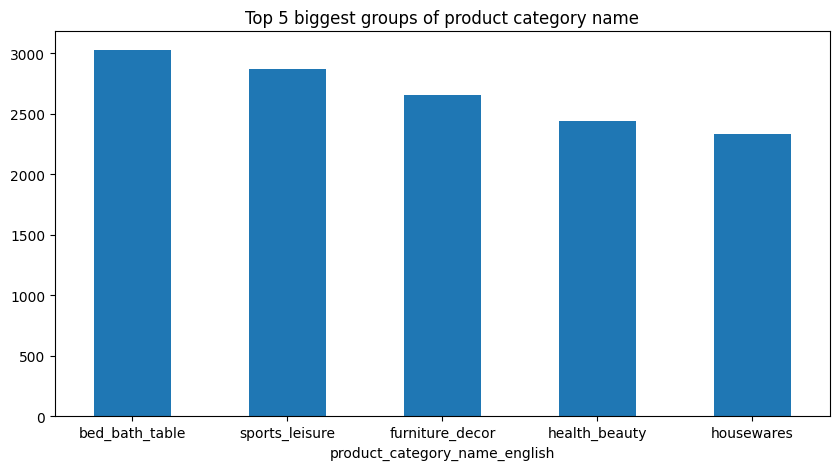

In [109]:
df_products["product_category_name_english"].value_counts().head(5).plot.bar(rot = 0, figsize = (10,5), title="Top 5 biggest groups of product category name")

6.10. Calculating the cm³ volume of the order package -> product_height * length * width

In [110]:
df_products["cubic_cm"] = df_products["product_length_cm"] * df_products["product_height_cm"] * df_products["product_width_cm"]

6.11. Adding review_label column to the olist_order_reviews_dataset table

In [111]:
df_order_reviews = df_order_reviews[~df_order_reviews.duplicated()]

In [112]:
print(f"Number of reviews with score higher than 5: {len(df_order_reviews[df_order_reviews["review_score"]>5])}")

Number of reviews with score higher than 5: 1585


Deleting invalid records (where review score exceeds the maximum allowed value of 5)

In [113]:
df_order_reviews = df_order_reviews[df_order_reviews["review_score"] <= 5]
len(df_order_reviews)

99223

In [114]:
review_labels = {
    1: "Terrible",
    2: "Bad",
    3: "Average",
    4: "Good",
    5: "Excellent"
}

df_order_reviews["review_label"] = df_order_reviews["review_score"].map(review_labels)
df_order_reviews.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_label
0,73fc7af87114b39712e6da79b0a377eb,4.0,None,None,2018-01-18,2018-01-18 21:46:59,Good
1,a548910a1c6147796b98fdf73dbeba33,5.0,None,None,2018-03-10,2018-03-11 03:05:13,Excellent
2,f9e4b658b201a9f2ecdecbb34bed034b,5.0,None,None,2018-02-17,2018-02-18 14:36:24,Excellent
3,658677c97b385a9be170737859d3511b,5.0,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,Excellent
4,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,None,ParabĂ©ns lojas lannister adorei comprar pela ...,2018-03-01,2018-03-02 10:26:53,Excellent


<Axes: title={'center': 'Number of reach score in reviews'}, xlabel='review_label'>

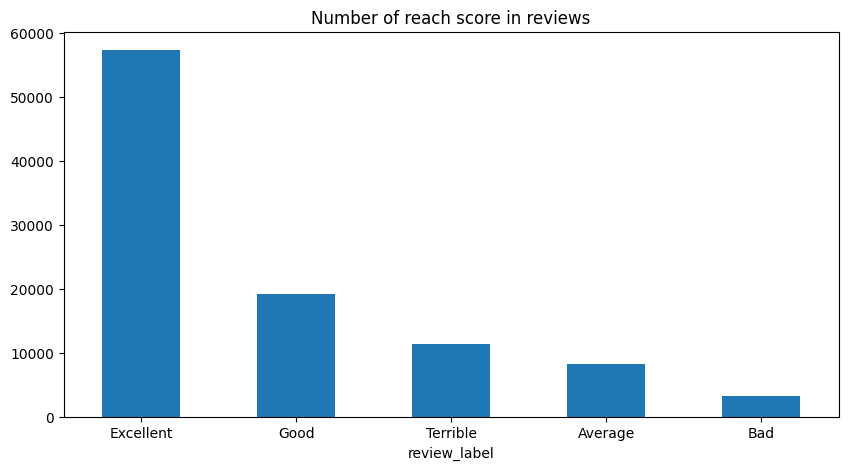

In [115]:
df_order_reviews["review_label"].value_counts().head().plot.bar(rot = 0, figsize = (10,5), title = "Number of reach score in reviews")

6.12. In the 'olist_order_reviews_dataset' table, adding a column that will be populated as promoter/non-promoter based on the value in the review_score column

In [116]:
loyalty_labels = {
    1: "Detractor",
    2: "Detractor",
    3: "Passive",
    4: "Promoter",
    5: "Promoter"
}

df_order_reviews["loyalty_labels"] = df_order_reviews["review_score"].map(loyalty_labels)
df_order_reviews.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_label,loyalty_labels
0,73fc7af87114b39712e6da79b0a377eb,4.0,None,None,2018-01-18,2018-01-18 21:46:59,Good,Promoter
1,a548910a1c6147796b98fdf73dbeba33,5.0,None,None,2018-03-10,2018-03-11 03:05:13,Excellent,Promoter
2,f9e4b658b201a9f2ecdecbb34bed034b,5.0,None,None,2018-02-17,2018-02-18 14:36:24,Excellent,Promoter
3,658677c97b385a9be170737859d3511b,5.0,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,Excellent,Promoter
4,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,None,ParabĂ©ns lojas lannister adorei comprar pela ...,2018-03-01,2018-03-02 10:26:53,Excellent,Promoter


#### 7. Saving transformed data back to database 

In [117]:
'''
df_customers.to_sql('dbo.customers_transformed', engine)
df_sellers.to_sql('sellers_transformed', engine, index = False)
merged_customers_sellers_geolocation.to_sql('customers_sellers_geolocation', engine, index = False)
df_orders.to_sql('orders_transformed', engine, index = False)
df_order_payments.to_sql('order_payments_transformed', engine, index = False)
df_order_items.to_sql('order_items_transformed', engine, index = False)
df_products.to_sql('products_transformed', engine, index = False)
df_order_reviews.to_sql('order_reviews', engine, index = False)
'''

"\ndf_customers.to_sql('dbo.customers_transformed', engine)\ndf_sellers.to_sql('sellers_transformed', engine, index = False)\nmerged_customers_sellers_geolocation.to_sql('customers_sellers_geolocation', engine, index = False)\ndf_orders.to_sql('orders_transformed', engine, index = False)\ndf_order_payments.to_sql('order_payments_transformed', engine, index = False)\ndf_order_items.to_sql('order_items_transformed', engine, index = False)\ndf_products.to_sql('products_transformed', engine, index = False)\ndf_order_reviews.to_sql('order_reviews', engine, index = False)\n"